# BASIC

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [4]:
# Load the dataset
file_path = '/Users/veronicangelin/Downloads/DSA4262/cleaned_data.csv'
df = pd.read_csv(file_path)

In [5]:
# Separate features and target
X = df.drop(columns=['PCOS (Y/N)'])  # Drop target variable from features
y = df['PCOS (Y/N)']

# Handle categorical variables if any
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Define and train Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [8]:
# Predict on the test set
y_pred = gpc.predict(X_test)
y_prob = gpc.predict_proba(X_test)[:, 1]  # Probability estimates for AUC-ROC

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')
print('Classification Report:\n', report)

Accuracy: 0.8962
Precision: 0.8621
Recall: 0.7812
F1 Score: 0.8197
AUC-ROC: 0.9578
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.86      0.78      0.82        32

    accuracy                           0.90       106
   macro avg       0.89      0.86      0.87       106
weighted avg       0.89      0.90      0.89       106



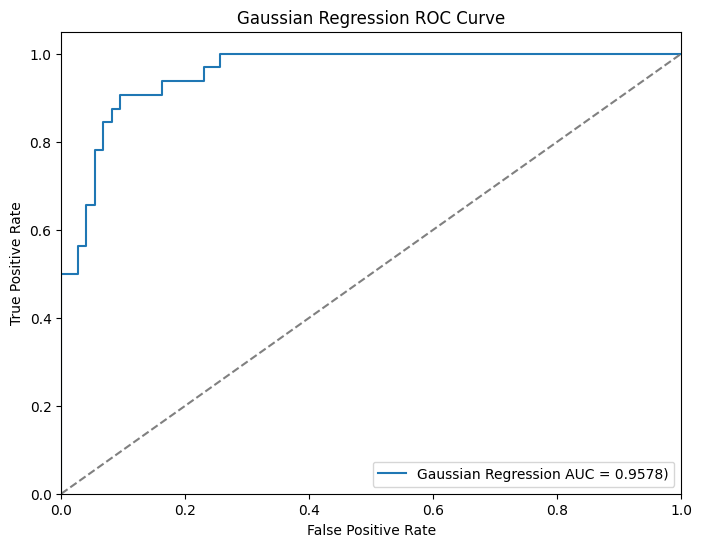

In [16]:
# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Regression AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# GridSearch, Using new threshold

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, f_classif


In [11]:
# Load the dataset
file_path = 'cleaned_data.csv'
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(529, 44)


,PCOS (Y/N),Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,...,Blood Group_A+,Blood Group_A-,Blood Group_AB+,Blood Group_AB-,Blood Group_B+,Blood Group_B-,Blood Group_O+,Blood Group_O-,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,0,28,19.3,78,22,10.48,5,7.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,36,24.9,74,20,11.70,5,11.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,33,25.3,72,18,11.80,5,10.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,37,29.7,72,20,12.00,5,4.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,25,20.1,72,18,10.00,5,1.0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Splitting into train and test datasets

In [12]:
# Separate features and target
X = df.drop(columns=['PCOS (Y/N)'])  # Drop target variable from features
y = df['PCOS (Y/N)']

# Convert categorical variables to one-hot encoded
X = pd.get_dummies(X, drop_first=True)

# Split first!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
cat_cols = ['Blood Group_A+', 'Blood Group_A-', 'Blood Group_AB+','Blood Group_AB-', 
            'Blood Group_B+', 'Blood Group_B-', 'Blood Group_O+', 'Blood Group_O-', 
            'Menstrual Cycle(R/I)_irregular', 'Menstrual Cycle(R/I)_regular', 'Weight gain(Y/N)', 
            'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
            'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Pregnant(Y/N)']

numerical_cols = [col for col in X_train.columns if col not in cat_cols]

# Scale numerical columns only
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [13]:
# Hyperparameter tuning for length_scale
# Hyperparameter tuning for different kernels
param_grid = {
    'kernel': [
        1.0 * RBF(length_scale=l) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ] + [
        1.0 * Matern(length_scale=l, nu=1.5) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ] + [
        1.0 * RationalQuadratic(length_scale=l, alpha=1.0) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ]
}

gpc = GridSearchCV(GaussianProcessClassifier(random_state=42, warm_start=True), 
                   param_grid, 
                   cv=5, 
                   scoring='roc_auc')

# Use the scaled training set
gpc.fit(X_train_scaled, y_train)

# Best model selection
gpc_best = gpc.best_estimator_

# Use the scaled test set
y_pred = gpc_best.predict(X_test_scaled)
y_prob = gpc_best.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for AUC-ROC


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [18]:
from sklearn.metrics import confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # aka Sensitivity / True Positive Rate
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
report = classification_report(y_test, y_pred)

# Compute confusion matrix for specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print results
print(f'Best Kernel: {gpc.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')
print('Classification Report:\n', report)

Best Kernel: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=0.025)}
Accuracy: 0.8679
Precision: 0.8214
Recall (Sensitivity): 0.7188
Specificity: 0.9324
F1 Score: 0.7667
AUC-ROC: 0.9519
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        74
           1       0.82      0.72      0.77        32

    accuracy                           0.87       106
   macro avg       0.85      0.83      0.84       106
weighted avg       0.87      0.87      0.87       106



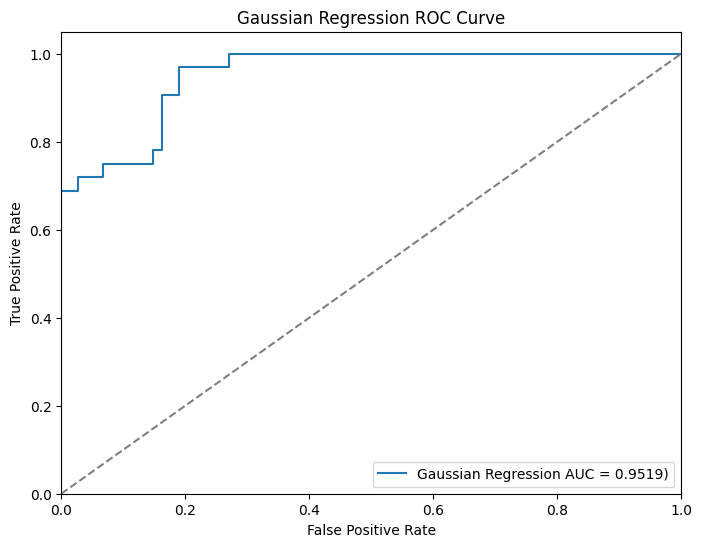

In [15]:
# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Regression AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Finding the best threshold

In [19]:
# This method minimizes the distance to the top-left corner of the ROC space.
from sklearn.metrics import roc_curve

# Compute FPR, TPR, and thresholds from predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Euclidean distance to the top-left corner (0,1)
distances = np.sqrt((1 - tpr)**2 + fpr**2)

# Find index of the smallest distance
best_index = np.argmin(distances)

# Retrieve the best threshold
best_thresh = thresholds[best_index]

print(f"Best threshold: {best_thresh:.4f}")

Best threshold: 0.3913


In [20]:
# Predict using the best threshold
y_pred_best = (y_prob >= best_thresh).astype(int)

# Evaluate using the new threshold
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        74
           1       0.71      0.91      0.79        32

    accuracy                           0.86       106
   macro avg       0.83      0.87      0.84       106
weighted avg       0.88      0.86      0.86       106



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate using the best threshold
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
auc_roc_best = roc_auc_score(y_test, y_prob)  # stays the same, based on y_prob

# Confusion matrix to compute specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
specificity_best = tn / (tn + fp)

# Classification report
report_best = classification_report(y_test, y_pred_best)

# Print results
print(f"\n--- Evaluation at Best Threshold ({best_thresh:.4f}) ---")
print(f'Accuracy: {accuracy_best:.4f}')
print(f'Precision: {precision_best:.4f}')
print(f'Recall (Sensitivity): {recall_best:.4f}')
print(f'Specificity: {specificity_best:.4f}')
print(f'F1 Score: {f1_best:.4f}')
print(f'AUC-ROC: {auc_roc_best:.4f}')
print('Classification Report:\n', report_best)


--- Evaluation at Best Threshold (0.3913) ---
Accuracy: 0.8585
Precision: 0.7073
Recall (Sensitivity): 0.9062
Specificity: 0.8378
F1 Score: 0.7945
AUC-ROC: 0.9519
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        74
           1       0.71      0.91      0.79        32

    accuracy                           0.86       106
   macro avg       0.83      0.87      0.84       106
weighted avg       0.88      0.86      0.86       106



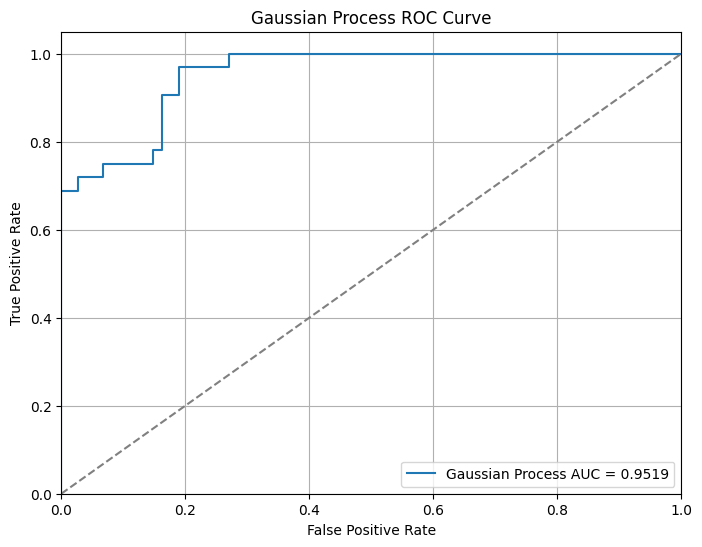

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assume fpr, tpr, y_test, and y_prob are already defined
# auc_roc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Process AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Process ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Comparison Table

In [24]:
# Metrics at threshold 0.5
metrics_default = {
    "Accuracy": 0.8679,
    "Precision": 0.8214,
    "Recall (Sensitivity)": 0.7188,
    "Specificity": 0.9324,
    "F1 Score": 0.7667,
    "AUC-ROC": 0.9519
}

# Metrics at best threshold (0.3913)
metrics_best = {
    "Accuracy": 0.8585,
    "Precision": 0.7073,
    "Recall (Sensitivity)": 0.9062,
    "Specificity": 0.8378,
    "F1 Score": 0.7945,
    "AUC-ROC": 0.9519
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Threshold = 0.5": metrics_default,
    "Threshold = 0.3913 (Best)": metrics_best
})

# Display the table
print(comparison_df.round(4))


                      Threshold = 0.5  Threshold = 0.3913 (Best)
Accuracy                       0.8679                     0.8585
Precision                      0.8214                     0.7073
Recall (Sensitivity)           0.7188                     0.9062
Specificity                    0.9324                     0.8378
F1 Score                       0.7667                     0.7945
AUC-ROC                        0.9519                     0.9519
